# Projeto Airbnb Rio - Ferramenta de Previsão de Preço de Imóvel para pessoas comuns 

## Trajetória de um projeto em Data Science

1. Entendimento do desafio que queremos resolver
2. Entendimento da Empresa/Área
3. Extração/obtenção de dados
4. Ajustes de dados (Limpeza de dados)
5. Análise exploratória
6. Modelagem + algoritmos
7. Interpretação dos resultados
8. Deploy/produção

## Contexto

No Airbnb, qualquer pessoa que tenha um quarto ou um imóvel de qualquer tipo (apartamento, casa, chalé, pousada, etc.) pode ofertar o seu imóvel para ser alugado por diária.

Você cria o seu perfil de host (pessoa que disponibiliza um imóvel para aluguel por diária) e cria o anúncio do seu imóvel.

Nesse anúncio, o host deve descrever as características do imóvel da forma mais completa possível, de forma a ajudar os locadores/viajantes a escolherem o melhor imóvel para eles (e de forma a tornar o seu anúncio mais atrativo)

Existem dezenas de personalizações possíveis no seu anúncio, desde quantidade mínima de diária, preço, quantidade de quartos, até regras de cancelamento, taxa extra para hóspedes extras, exigência de verificação de identidade do locador, etc.

## Nosso objetivo

Construir um modelo de previsão de preço que permita uma pessoa comum que possui um imóvel possa saber quanto deve cobrar pela diária do seu imóvel.

Ou ainda, para o locador comum, dado o imóvel que ele está buscando, ajudar a saber se aquele imóvel está com preço atrativo (abaixo da média para imóveis com as mesmas características) ou não.

## O que temos disponível, inspirações e créditos

As bases de dados foram retiradas do site kaggle: https://www.kaggle.com/allanbruno/airbnb-rio-de-janeiro

Elas estão disponíveis para download abaixo da aula (se você puxar os dados direto do Kaggle pode ser que encontre resultados diferentes dos meus, afinal as bases de dados podem ter sido atualizadas).

Caso queira uma outra solução, podemos olhar como referência a solução do usuário Allan Bruno do kaggle no Notebook: https://www.kaggle.com/allanbruno/helping-regular-people-price-listings-on-airbnb

Você vai perceber semelhanças entre a solução que vamos desenvolver aqui e a dele, mas também algumas diferenças significativas no processo de construção do projeto.

- As bases de dados são os preços dos imóveis obtidos e suas respectivas características em cada mês.
- Os preços são dados em reais (R$)
- Temos bases de abril de 2018 a maio de 2020, com exceção de junho de 2018 que não possui base de dados

## Expectativas Iniciais

- Acredito que a sazonalidade pode ser um fator importante, visto que meses como dezembro costumam ser bem caros no RJ
- A localização do imóvel deve fazer muita diferença no preço, já que no Rio de Janeiro a localização pode mudar completamente as características do lugar (segurança, beleza natural, pontos turísticos)
- Adicionais/Comodidades podem ter um impacto significativo, visto que temos muitos prédios e casas antigos no Rio de Janeiro

Vamos descobrir o quanto esses fatores impactam e se temos outros fatores não tão intuitivos que são extremamente importantes.

# Importar Bibliotecas e Bases de Dados

In [40]:
import pandas as pd
import pathlib
from zipfile import ZipFile
import calendar
import re
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

## Funções

In [2]:
def month_filename(filename):
    month = 0
    year = 0
    if filename[:3] in meses.keys():
        month = meses[filename[:3]]
        year = int(filename[-8:(len(filename)-4)]) #.csv files
    return(month, year)

In [3]:
def multiple_zips_get_months(zippedFile, dataframe = pd.DataFrame(), file_type = '.csv', low_memory = False):
    for i, text_file in enumerate(zippedFile.infolist()):
        if (text_file.filename.endswith(file_type)):
            # show progress
            print('{}/{} ({:.0%}) >> {}'.format((i+1), len(zip_file.infolist()),
                                (i+1)/len(zip_file.infolist()),
                                 text_file.filename))
            # read file
            file = pd.read_csv(zippedFile.open(text_file.filename), low_memory= low_memory)
             
            # add month and year
            just_filename = re.findall(re.compile(r'/(.+)'),text_file.filename)[0]
            mes, ano = month_filename(just_filename)
            file['mes'] = mes
            file['ano'] = ano
            
            # concat files
            dataframe = pd.concat([dataframe, file])
    return dataframe

## Meses (em pt)

In [4]:
# to portuguese
meses = {month: index for index, month in enumerate(calendar.month_abbr) if month}
meses = {'Fev' if k == 'Feb'
         else 'Abr' if k == 'Apr' 
         else 'Mai' if k == 'May'
         else 'Ago' if k == 'Aug'
         else 'Set' if k == 'Sep'
         else 'Out' if k == 'Oct'
         else 'Dez' if k == 'Dec'
         else k:v for k,v in meses.items()}
meses = {k.lower(): v for k, v in meses.items()}
meses.keys() 

dict_keys(['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez'])

## Diretório

In [5]:
caminho = pathlib.Path(r'../../PYTHON/HASHTAG/data/')
zipped_file = pathlib.Path(r'dataset - projeto ds.zip')
zip_file = ZipFile(caminho / zipped_file)
zip_file

<zipfile.ZipFile filename='..\\..\\PYTHON\\HASHTAG\\data\\dataset - projeto ds.zip' mode='r'>

# Lendo dados

In [6]:
base_airbnb_raw = multiple_zips_get_months(zip_file)

1/25 (4%) >> dataset/abril2018.csv
2/25 (8%) >> dataset/abril2019.csv
3/25 (12%) >> dataset/abril2020.csv
4/25 (16%) >> dataset/agosto2018.csv
5/25 (20%) >> dataset/agosto2019.csv
6/25 (24%) >> dataset/dezembro2018.csv
7/25 (28%) >> dataset/dezembro2019.csv
8/25 (32%) >> dataset/fevereiro2019.csv
9/25 (36%) >> dataset/fevereiro2020.csv
10/25 (40%) >> dataset/janeiro2019.csv
11/25 (44%) >> dataset/janeiro2020.csv
12/25 (48%) >> dataset/julho2018.csv
13/25 (52%) >> dataset/julho2019.csv
14/25 (56%) >> dataset/junho2019.csv
15/25 (60%) >> dataset/maio2018.csv
16/25 (64%) >> dataset/maio2019.csv
17/25 (68%) >> dataset/maio2020.csv
18/25 (72%) >> dataset/maro2019.csv
19/25 (76%) >> dataset/maro2020.csv
20/25 (80%) >> dataset/novembro2019.csv
21/25 (84%) >> dataset/novrmbro2018.csv
22/25 (88%) >> dataset/outubro2018.csv
23/25 (92%) >> dataset/outubro2019.csv
24/25 (96%) >> dataset/setembro2018.csv
25/25 (100%) >> dataset/setembro2019.csv


In [7]:
base_airbnb = base_airbnb_raw.copy()

In [8]:
base_airbnb.shape

(902210, 108)

In [9]:
base_airbnb.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,14063,https://www.airbnb.com/rooms/14063,20180414160018,2018-04-14,Living in a Postcard,"Besides the most iconic's view, our apartment ...",NaN,"Besides the most iconic's view, our apartment ...",none,Best and favorite neighborhood of Rio. Perfect...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17878,https://www.airbnb.com/rooms/17878,20180414160018,2018-04-14,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for New Y...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for New Y...,none,This is the best spot in Rio. Everything happe...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24480,https://www.airbnb.com/rooms/24480,20180414160018,2018-04-14,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,The studio is located at Vinicius de Moraes St...,My studio is located in the best of Ipanema. ...,none,"The beach, the lagoon, Ipanema is a great loca...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Se tivermos muitas colunas, já vamos identificar quais colunas podemos excluir

<font color = 'green'>Pode ser interessante acrescentar mais colunas, como um len() da descrição do local.
    <br >Talvez apartamentos melhores descritos sejam mais atrativos </font>

In [10]:
select_colunas = ['host_response_time',
                  'host_response_rate',
                  'host_is_superhost',
                  'host_listings_count',
                  'latitude',
                  'longitude',
                  'property_type',
                  'room_type',
                  'accommodates',
                  'bathrooms',
                  'bedrooms',
                  'beds',
                  'bed_type',
                  'amenities',
                  'price',
                  'security_deposit',
                  'cleaning_fee',
                  'guests_included',
                  'extra_people',
                  'minimum_nights',
                  'maximum_nights',
                  'number_of_reviews',
                  'review_scores_rating',
                  'review_scores_accuracy',
                  'review_scores_cleanliness',
                  'review_scores_checkin',
                  'review_scores_communication',
                  'review_scores_location',
                  'review_scores_value',
                  'instant_bookable',
                  'is_business_travel_ready',
                  'cancellation_policy',
                  'ano',
                  'mes']

In [11]:
base_airbnb = base_airbnb.loc[:, select_colunas]
base_airbnb.head(2)

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,ano,mes
0,NaN,NaN,f,1.0,-22.946854,-43.182737,Apartment,Entire home/apt,4,1.0,...,9.0,9.0,9.0,9.0,9.0,f,f,strict_14_with_grace_period,2018,4
1,within an hour,100%,t,2.0,-22.965919,-43.178962,Condominium,Entire home/apt,5,1.0,...,9.0,10.0,10.0,9.0,9.0,t,f,strict,2018,4


# Tratar Valores Faltando

In [12]:
print(base_airbnb.isnull().sum())

host_response_time             401843
host_response_rate             401846
host_is_superhost                 460
host_listings_count               460
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                        1724
bedrooms                          850
beds                             2502
bed_type                            0
amenities                           0
price                               0
security_deposit               421280
cleaning_fee                   313506
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
number_of_reviews                   0
review_scores_rating           448016
review_scores_accuracy         448586
review_scores_cleanliness      448413
review_scores_checkin          448650
review_score

In [13]:
for coluna in base_airbnb:
    if base_airbnb[coluna].isnull().sum() > 300000:
        base_airbnb = base_airbnb.drop(coluna, axis= 1)
print(base_airbnb.isnull().sum())

host_is_superhost            460
host_listings_count          460
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                   1724
bedrooms                     850
beds                        2502
bed_type                       0
amenities                      0
price                          0
guests_included                0
extra_people                   0
minimum_nights                 0
maximum_nights                 0
number_of_reviews              0
instant_bookable               0
is_business_travel_ready       0
cancellation_policy            0
ano                            0
mes                            0
dtype: int64


# Verificar Tipos de Dados em cada coluna

In [17]:
print(base_airbnb.dtypes)
print('-'*100)
print(base_airbnb.iloc[0])

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                        object
guests_included               int64
extra_people                 object
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object
----------------------------------------------------------------------------------------------------
host_is_superhost                                        

In [35]:
# mudando os tipos de price
base_airbnb['price'] = base_airbnb['price'].str.replace('$', '')
base_airbnb['price'] = base_airbnb['price'].str.replace(',', '')
base_airbnb['price'] = base_airbnb['price'].astype(np.float32 # float32 ocupa menos espaço na memória
                                      ,copy = False) # vai mudar esse objeto pandas, não vai criar uma cópia 


C:\Users\Caroline\AppData\Local\Temp\ipykernel_5808\3834560822.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  base_airbnb['price'] = base_airbnb['price'].str.replace('$', '')


In [36]:
# mudando os tipos de extra_people
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace('$', '')
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace(',', '')
base_airbnb['extra_people'] = base_airbnb['extra_people'].astype(np.float32 # float32 ocupa menos espaço na memória
                                      ,copy = False) # vai mudar esse objeto pandas, não vai criar uma cópia 

C:\Users\Caroline\AppData\Local\Temp\ipykernel_5808\3712765058.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace('$', '')


In [32]:
teste = base_airbnb.copy()

# Análise Exploratória e Tratar Outliers

pegar texto de outliers

<AxesSubplot:>

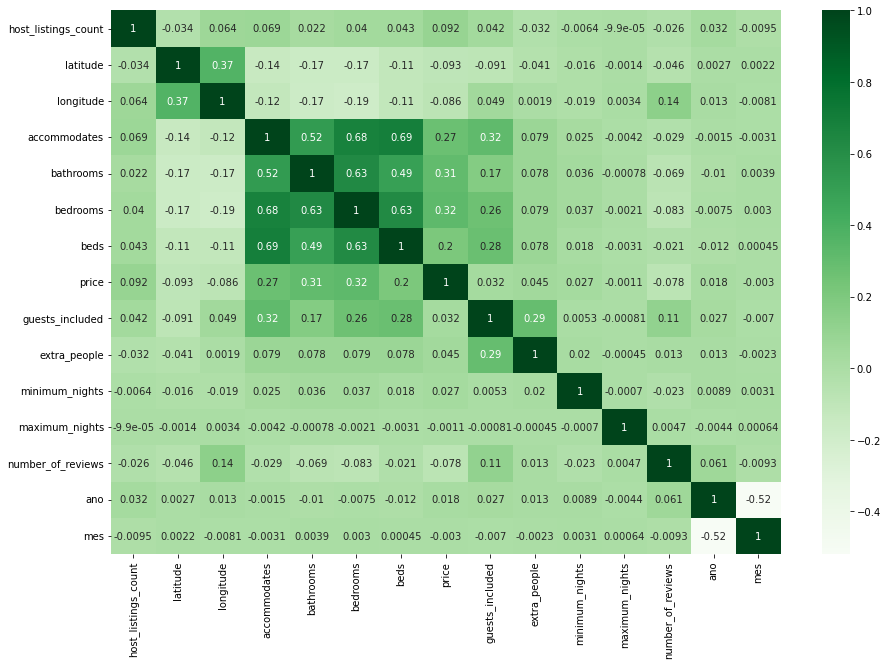

In [41]:
plt.figure(figsize = (15, 10))
sns.heatmap(base_airbnb.corr(), annot=True, cmap = 'Greens')

In [42]:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3-q1
    return q1-(1.5*amplitude), q3+(1.5*amplitude)

def excluir_outliers(df, col):
    # linhas do df 
    qtd_linhas = df.shape[0]
    
    # identificar outliers
    # remover outliers
    df = df.loc[df[col]]
    
    # diferença de linhas do df sem outliers 
    linhas_removidas = qtd_linhas - df.shape[0]
    

In [43]:
base_airbnb.price.describe()

count    902210.000000
mean        647.747864
std        1703.828369
min           0.000000
25%         151.000000
50%         296.000000
75%         601.000000
max      138288.000000
Name: price, dtype: float64

In [44]:
limites(base_airbnb.price)

(-524.0, 1276.0)

In [66]:
def dois_boxplots(coluna):
    # subplot
    fig, (ax1, ax2) = plt.subplots(1,2)
    
    # tamanho da figura
    fig.set_size_inches(15, 5)
    
    # boxplot dos dados 
    sns.boxplot(x = coluna, ax= ax1)
    
    # boxplot sem outliers
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x = coluna, ax= ax2)

def histogramas(coluna):
    #tamanho da figura
    plt.figure(figsize = (15,5))
    
    #histograma
    sns.distplot(x=coluna)

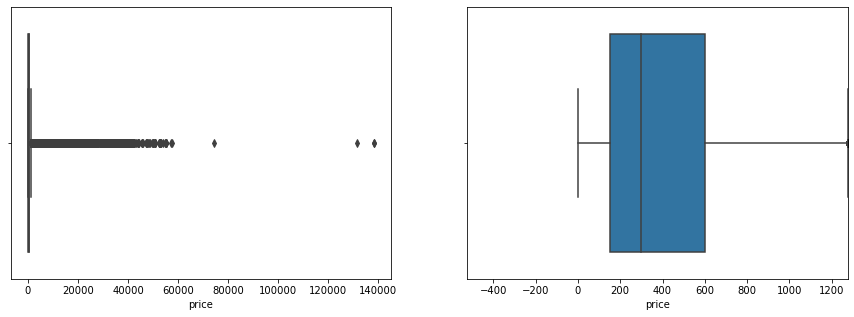

In [50]:
dois_boxplots(base_airbnb['price'])

C:\Users\Caroline\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


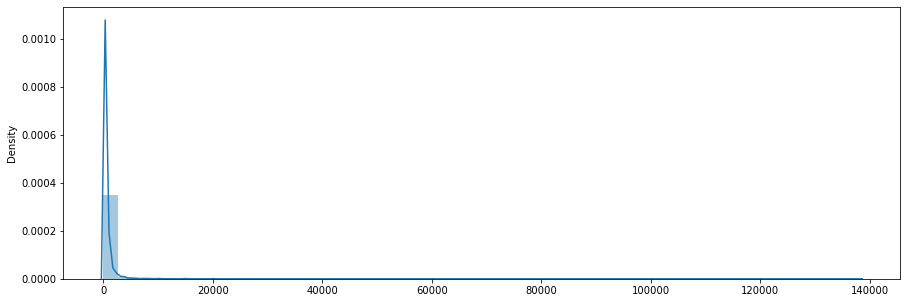

In [67]:
histogramas(base_airbnb['price'])

# Encoding

# Modelo de Previsão

# Análise do Melhor Modelo

# Ajustes e Melhorias no Melhor Modelo